In [19]:
import Plots

In [40]:
# Generating a Dataset
X = trunc.(rand(250) * 500)
f(x) = x *3 + 45;
Y = f.(X)
Y += randn(250) * 50

250-element Vector{Float64}:
  103.53063967507727
 1144.8265660144034
 1386.3170563114145
  836.2233977580431
  984.0602439008961
  527.0236497995047
  546.6270655589719
  305.6039941516323
  485.6839189844381
  206.03298294468644
    ⋮
  936.3734919231955
  890.6653459581178
  942.5658308915813
  699.5697709372496
  477.87676261645726
 1145.759913677402
  468.766278738049
  693.8580266152265
  131.86160401070606

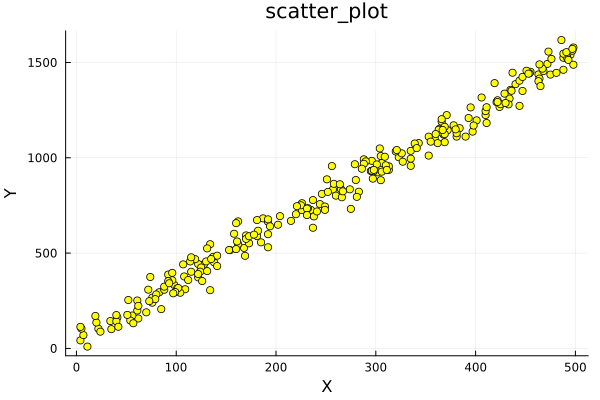

In [41]:
Plots.scatter(X,Y,color=:yellow,xlabel="X",ylabel="Y",
                title="scatter_plot",legend=false)